In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


In [147]:
Orginal_data=pd.read_csv("train.csv")

In [148]:
Orginal_data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [149]:
print("Number of data points in our data", Orginal_data.shape)

Number of data points in our data (5279, 4)


#  [2] Exploratory Data Analysis

In [150]:
#Deduplication of entries
deduplicate_data=Orginal_data.drop_duplicates(subset={"unique_hash","text","drug","sentiment"}, keep='first', inplace=False)
deduplicate_data.shape

(5279, 4)

In [151]:
#Checking to see how much % of data still remains
(deduplicate_data['unique_hash'].size*1.0)/(Orginal_data['unique_hash'].size*1.0)*100

100.0

In [152]:
Orginal_data["drug"].unique()

array(['gilenya', 'fingolimod', 'ocrevus', 'cladribine', 'humira',
       'tagrisso', 'lucentis', 'pan-retinal photocoagulation', 'remicade',
       'stelara', 'ocrelizumab', 'dexamethasone', 'pemetrexed', 'cimzia',
       'tarceva', 'nivolumab', 'tecentriq', 'ipilimumab', 'mekinist',
       'opdivo', 'dexamethasone implant', 'eylea', 'erlotinib',
       'alectinib', 'entyvio', 'crizotinib', 'keytruda', 'mavenclad',
       'osimertinib', 'vedolizumab', 'atezolizumab', 'durvalumab',
       'alimta', 'tysabri', 'avastin', 'golimumab', 'tofacitinib',
       'ixifi', 'teriflunomide', 'ranibizumab', 'afatinib',
       'upadacitinib', 'zykadia', 'ustekinumab', 'xalkori',
       'pembrolizumab', 'lemtrada', 'siponimod', 'simponi', 'inflectra',
       'entrectinib', 'yervoy', 'vitrectomy', 'bevacizumab', 'gefitinib',
       'amjevita', 'lorlatinib', 'pemrolizumab', 'tafinlar',
       'infliximab-dyyb', 'ozurdex', 'gilotrif', 'imfinzi', 'iressa',
       'laser photocoagulation', 'renflexis', 'a

In [153]:
len(Orginal_data["drug"].unique())

102

In [154]:
Orginal_data["sentiment"].unique()

array([2, 1, 0], dtype=int64)

In [155]:
#Count of each label
deduplicate_data['sentiment'].value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

In [156]:
deduplicate_data['drug'].value_counts()

ocrevus                         676
gilenya                         666
ocrelizumab                     441
entyvio                         303
humira                          270
fingolimod                      238
remicade                        229
opdivo                          224
tarceva                         218
cladribine                      200
keytruda                        199
stelara                         161
tagrisso                        161
alimta                          146
lucentis                         67
eylea                            65
avastin                          52
nivolumab                        50
cimzia                           48
crizotinib                       43
alectinib                        43
vitrectomy                       41
simponi                          39
erlotinib                        35
tecentriq                        34
xalkori                          33
pemetrexed                       33
tysabri                     

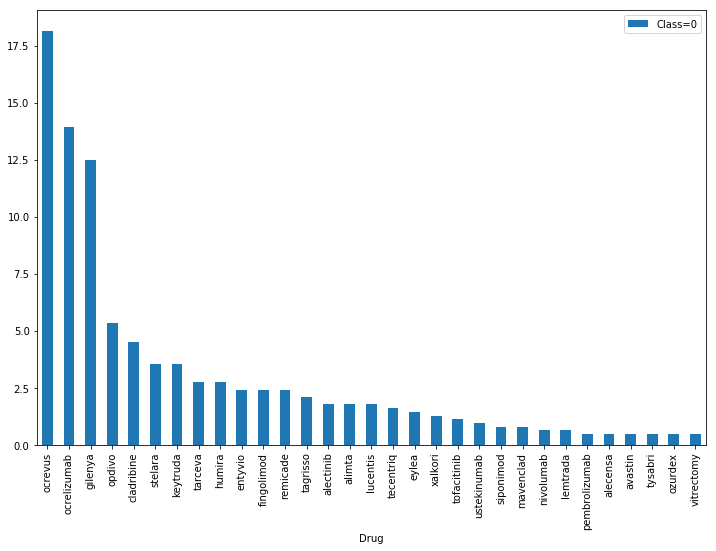

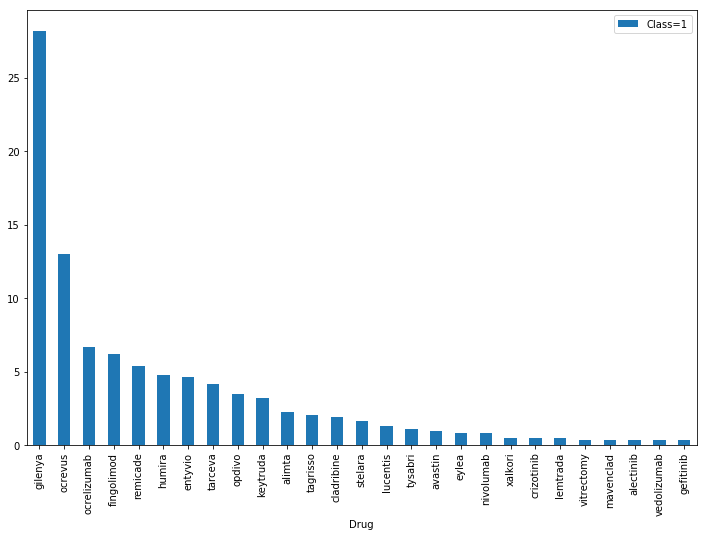

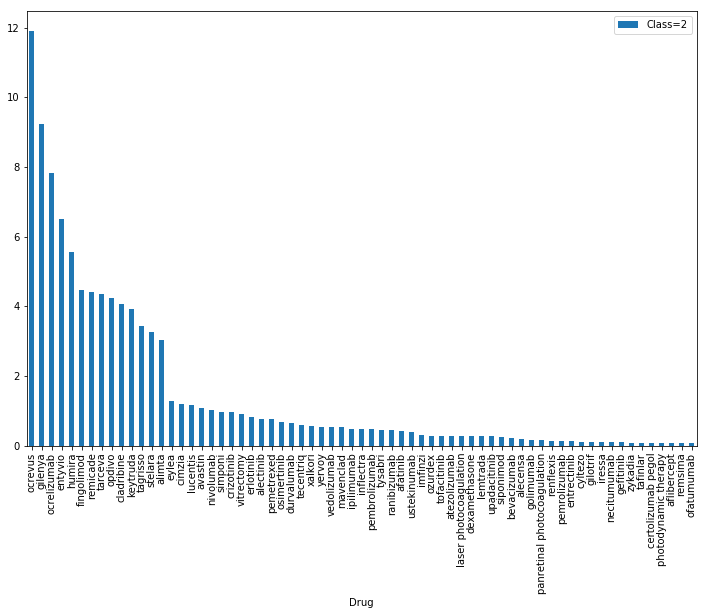

In [157]:
for i in range(0, 2+1):
    classes = deduplicate_data.loc[deduplicate_data['sentiment'] == i]
    
    
    
    #Counting each Drug count that had occured for the particluar class
    count_drugs = classes.drug.value_counts().reset_index()
    #Giving column names as 'Drug','Count'
    count_drugs.columns = ['Drug', 'Count']
    #Getting the total count of Drug's
    total = count_drugs.Count.sum()
    #Getting the percentage count of each Drug
    count_drugs['Percentage'] = (count_drugs.Count/total)*100
    #Plotting Drug having only greater than 2 occurences
    count_drugs.loc[count_drugs['Count'] > 2].plot(x='Drug', y='Percentage', kind='bar', figsize=(12, 8),label="Class=%d"%(i,))

In [158]:
deduplicate_data['text']=preprocessed_reviews

In [159]:
#Calculating the length of each text 
length=[]
for i in range(0,5279):
    try:
        strr=deduplicate_data['text'][i]
    #print(str)
        length.append(len(strr.split()))
        
    except:
        pass

In [135]:
deduplicate_data['text_length']=length

In [136]:
deduplicate_data.tail()

,unique_hash,text,drug,sentiment,text_length
5274,5b5d129f3bab30fbb4740540a16856907657f005,hi bee thanks update good news scan hard say e...,alimta,0,114
5275,1aa7dde5dc5249ebc3490c1fbac6ca6df48753a2,blood testing done check levels humira trough ...,entyvio,2,73
5276,e9159c3f836f453f5f133008d40b7e65f9e70a42,best husband family,opdivo,2,3
5277,63d57717bd0cf650f91a5137bd1b427ba922edea,hi bazza luckily eyes not badly affected get h...,lucentis,2,62
5278,c29143e9c1c299847e437412649b5738d861b9d0,well ms appeared mild number years no relapses...,ocrevus,0,53


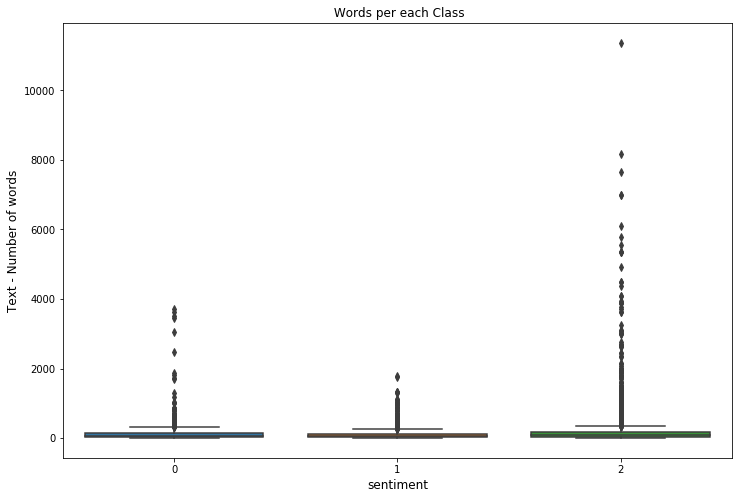

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
#Plot the number of words distribution for each class in combined text
plt.figure(figsize=(12,8))
sns.boxplot(x=deduplicate_data['sentiment'], y=deduplicate_data['text_length'], data=deduplicate_data)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.title(' Words per each Class')
plt.show()

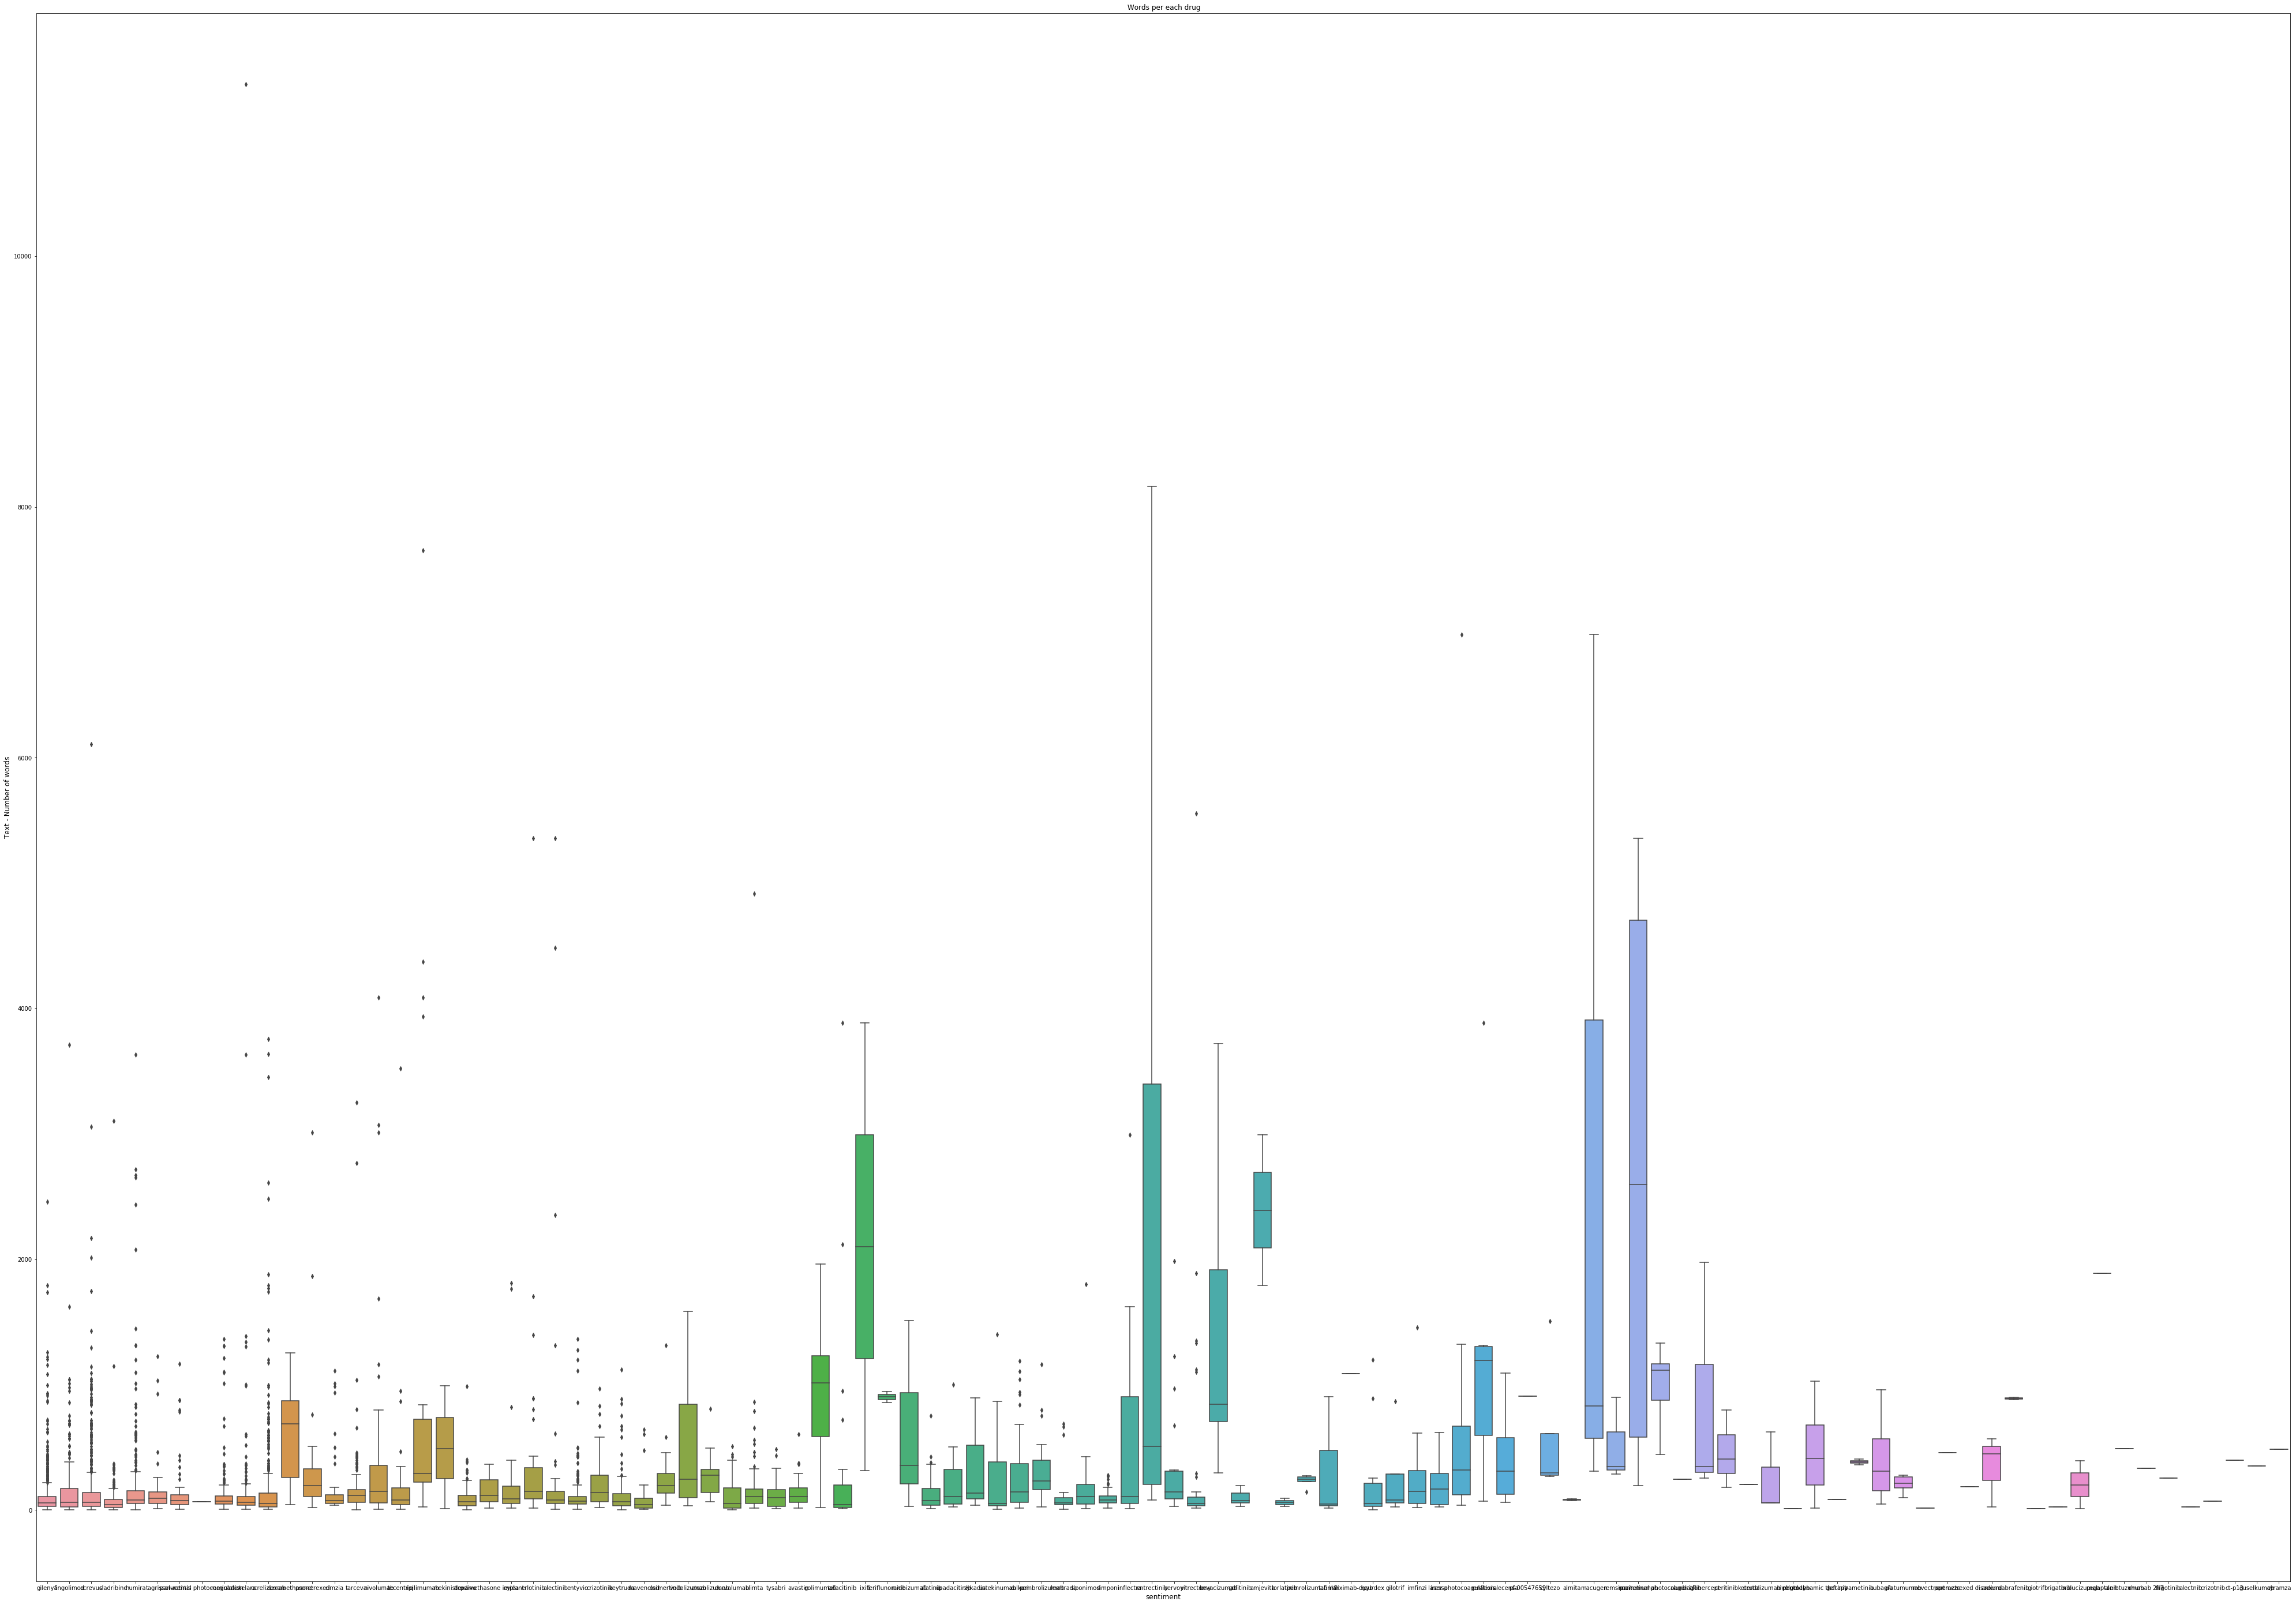

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
#Plot the number of words distribution for each class in combined text
plt.figure(figsize=(70,50))
sns.boxplot(x=deduplicate_data['drug'], y=deduplicate_data['text_length'], data=deduplicate_data)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.title(' Words per each drug')
plt.show()

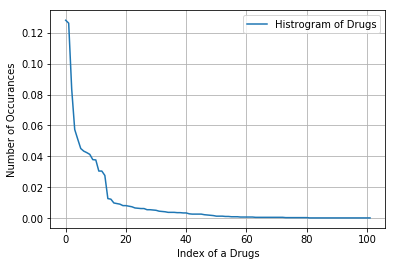

In [140]:
s = sum(unique_drugs.values);
h = unique_drugs.values/s;
plt.plot(h, label="Histrogram of Drugs")
plt.xlabel('Index of a Drugs')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

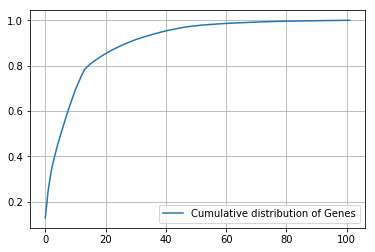

In [141]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

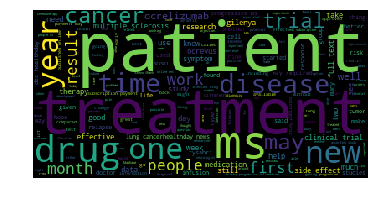

In [142]:
SF3B1  = deduplicate_data.loc[deduplicate_data['sentiment']==0]
final_text=[]
str_join=''
#Calculating the length of each text 
for i in range(0,5279):
    try:
        strr=SF3B1['text'][i]
        #print(strr.split())
        final_text.append((strr.split()))
        
    except:
        pass
    

for i in range(0,len(final_text)):
    str_join =str_join+ " ".join(final_text[i])
    
    
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(background_color="Black").generate(str_join)

plt.imshow(cloud)
plt.axis('off')
plt.show()

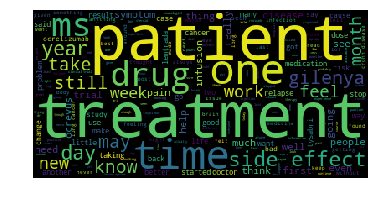

In [143]:
SF3B1  = deduplicate_data.loc[deduplicate_data['sentiment']==1]
final_text=[]
str_join=''
#Calculating the length of each text 
for i in range(0,5279):
    try:
        strr=SF3B1['text'][i]
        #print(strr.split())
        final_text.append((strr.split()))
        
    except:
        pass
    

for i in range(0,len(final_text)):
    str_join =str_join+ " ".join(final_text[i])
    
    
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(background_color="Black").generate(str_join)

plt.imshow(cloud)
plt.axis('off')
plt.show()

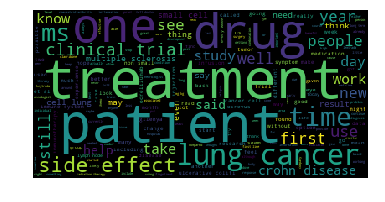

In [144]:
SF3B1  = deduplicate_data.loc[deduplicate_data['sentiment']==2]
final_text=[]
str_join=''
#Calculating the length of each text 
for i in range(0,5279):
    try:
        strr=SF3B1['text'][i]
        #print(strr.split())
        final_text.append((strr.split()))
        
    except:
        pass
    

for i in range(0,len(final_text)):
    str_join =str_join+ " ".join(final_text[i])
    
    
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(background_color="Black").generate(str_join)

plt.imshow(cloud)
plt.axis('off')
plt.show()

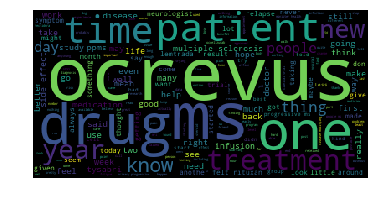

In [145]:
SF3B1  = deduplicate_data.loc[deduplicate_data['drug']=="ocrevus"]
final_text=[]
str_join=''
#Calculating the length of each text 
for i in range(0,5279):
    try:
        strr=SF3B1['text'][i]
        #print(strr.split())
        final_text.append((strr.split()))
        
    except:
        pass
    

for i in range(0,len(final_text)):
    str_join =str_join+ " ".join(final_text[i])
    
    
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(background_color="Black").generate(str_join)

plt.imshow(cloud)
plt.axis('off')
plt.show()

# Data Preprocessing

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

Begin by removing the html tags 

Remove any punctuations or limited set of special characters like , or . or # etc. 

Check if the word is made up of english letters and is not alpha-numeric

Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

Convert the word to lowercase

Remove Stopwords

Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)

After which we collect the words used to describe positive and negative reviews

In [160]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [161]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren'])

In [162]:
# Combining all the above stundents 
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(Orginal_data['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|█████████████████████████████████████████████████████████████████████████████| 5279/5279 [00:08<00:00, 639.25it/s]


In [9]:
(preprocessed_reviews[0:4])

['autoimmune diseases tend come clusters gilenya feel good don think won change anything waste time energy taking tysabri feel amazing no symptoms dodgy color vision since always don know don know last month year decade ive decided enjoy ride no point worrying',
 'completely understand want try results reported lectures don always stand scrutiny peer review publication much still convincing hope work really aware happy risks great think important present balanced way understand don move straight first show promise animal study using drugs humans still lot animal data gather human data gather anyone tell safe effective tell many times animal studies don follow humans one major attrition points drug development unpredictability issues cladribine gilenya interaction wasn predicted people try doctors see patterns work going clemastine metformin exciting given said current condition personal risk tolerance makes sense try definitely wouldn everyone',
 'interesting targets receptors rather l

In [163]:
Orginal_data['text']=preprocessed_reviews

# <h2>Upsampling and downsampling</h2>

In [164]:
# separate minority and majority classes
from sklearn.utils import resample
positive = Orginal_data[Orginal_data.sentiment==0]
neutral = Orginal_data[Orginal_data.sentiment==2]
negative= Orginal_data[Orginal_data.sentiment==1]

# upsample minority
positive_upsampled = resample(positive,
                          replace=True, # sample with replacement
                          n_samples=len(neutral), # match number in majority class
                          random_state=27) # reproducible results

# upsample minority
negative_upsampled = resample(negative,
                          replace=True, # sample with replacement
                          n_samples=len(neutral), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_positive = pd.concat([neutral, positive_upsampled,negative_upsampled])


In [37]:
neutral_downsampled = resample(neutral,
                                replace = False, # sample without replacement
                                n_samples = len(positive), # match minority n
                                random_state = 27) # reproducible results

In [38]:
# combine majority and upsampled minority
upsampled_positive = pd.concat([neutral_downsampled,negative_upsampled ,positive_upsampled])

In [165]:
upsampled_positive.shape

(11475, 4)

In [54]:
upsampled_positive["sentiment"].value_counts()

2    3825
1    3825
0    3825
Name: sentiment, dtype: int64

In [409]:
upsampled_positive.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,autoimmune diseases tend come clusters gilenya...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,completely understand want try results reporte...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,interesting targets receptors rather like fing...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,interesting grand merci wonder lemtrada ocrevu...,ocrevus,2
5,a043780c757966243779bf3c0d11bf6eef721971,give advice lemtrada chose cladribine thought ...,cladribine,2


# Downsample

In [356]:
# separate minority and majority classes
from sklearn.utils import resample
positive = Orginal_data[Orginal_data.sentiment==0]
neutral = Orginal_data[Orginal_data.sentiment==2]
negative= Orginal_data[Orginal_data.sentiment==1]

In [357]:
neutral_downsampled = resample(neutral,
                                replace = False, # sample without replacement
                                n_samples = len(positive), # match minority n
                                random_state = 27) # reproducible results

In [358]:
# combine majority and upsampled minority
upsampled_positive = pd.concat([neutral_downsampled, positive,negative])

In [359]:
upsampled_positive.shape

(2071, 4)

In [360]:
upsampled_positive['sentiment'].value_counts()

1    837
2    617
0    617
Name: sentiment, dtype: int64

In [200]:
# separate minority and majority classes
from sklearn.utils import resample
positive = Orginal_data[Orginal_data.sentiment==0]
neutral = Orginal_data[Orginal_data.sentiment==2]
negative= Orginal_data[Orginal_data.sentiment==1]

# upsample minority
positive_upsampled = resample(positive,
                          replace=True, # sample with replacement
                          n_samples=len(neutral), # match number in majority class
                          random_state=27) # reproducible results

# upsample minority
negative_upsampled = resample(negative,
                          replace=True, # sample with replacement
                          n_samples=len(neutral), # match number in majority class
                          random_state=27) # reproducible results

In [201]:
neutral_downsampled = resample(neutral,
                                replace = False, # sample without replacement
                                n_samples = len(positive), # match minority n
                                random_state = 27) # reproducible results

In [202]:
# combine majority and upsampled minority
upsampled_positive = pd.concat([neutral_downsampled, positive_upsampled,negative_upsampled])

In [203]:
upsampled_positive.shape

(8267, 4)

In [204]:
upsampled_positive['sentiment'].value_counts()

1    3825
0    3825
2     617
Name: sentiment, dtype: int64

In [205]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(upsampled_positive['drug'])

In [206]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(min_df=2,max_features=1000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(upsampled_positive['text'])

In [207]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)


In [208]:
train_x_onehotCoding = hstack((train_text_feature_onehotCoding, train_gene_feature_onehotCoding)).tocsr()
train_y = np.array(list(upsampled_positive['sentiment']))

In [209]:
train_gene_feature_onehotCoding.shape

(8267, 82)

# <h2>4.3. Logistic Regression</h2>

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
alpha = [0.0000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
param_grid = {"estimator__alpha":alpha }
LR = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
LR = GridSearchCV(LR, param_grid, cv=5,scoring='f1_macro')
LR.fit(train_text_feature_onehotCoding, y_train) 
LR.best_params_

{'estimator__alpha': 1e-05}

In [65]:
from sklearn.metrics import precision_score,recall_score,f1_score
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(train_x_onehotCoding, train_y)
predictions = classifier.predict (test_x_onehotCoding)
# predict the response
pred = classifier.predict(test_gene_feature_onehotCoding)

precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, pred))

Macro-average quality numbers
Precision: 0.8179, Recall: 0.8217, F1-measure: 0.8186
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       753
           1       0.83      0.86      0.84       752
           2       0.77      0.69      0.73       790

   micro avg       0.82      0.82      0.82      2295
   macro avg       0.82      0.82      0.82      2295
weighted avg       0.82      0.82      0.82      2295



# SVM

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='hinge')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
param_grid = {'alpha':alpha,'penalty':penalty}
knn_cv = GridSearchCV(clf, param_grid, cv=10,scoring='f1_macro')
knn_cv.fit(train_text_feature_onehotCoding, y_train) 
knn_cv.best_params_

{'alpha': 1e-05, 'penalty': 'l1'}

In [106]:
from sklearn import linear_model
from sklearn.calibration  import CalibratedClassifierCV
alpha_optimal = linear_model.SGDClassifier(alpha=0.00001,loss='hinge',penalty='l1')

alpha_optimal.fit(train_text_feature_onehotCoding, y_train)


SGDClassifier(alpha=1e-05, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:

# predict the response
pred = alpha_optimal.predict(test_gene_feature_onehotCoding)

precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, pred))

Macro-average quality numbers
Precision: 0.8434, Recall: 0.8435, F1-measure: 0.8369
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       753
           1       0.80      0.93      0.86       752
           2       0.87      0.66      0.75       790

   micro avg       0.84      0.84      0.84      2295
   macro avg       0.84      0.84      0.84      2295
weighted avg       0.84      0.84      0.84      2295



[[708  11  34]
 [  8 697  47]
 [107 159 524]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       753
           1       0.80      0.93      0.86       752
           2       0.87      0.66      0.75       790

   micro avg       0.84      0.84      0.84      2295
   macro avg       0.84      0.84      0.84      2295
weighted avg       0.84      0.84      0.84      2295



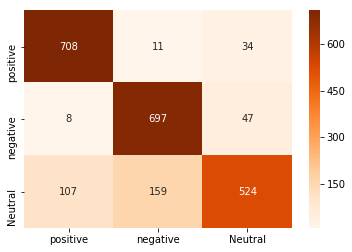

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(y_test, pred)
labels=['positive','negative','Neutral']
print(confm)
df_cm = DataFrame(confm, index=labels, columns=labels)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(y_test, pred, average='macro') 
print(classification_report(y_test, pred))

In [424]:
train_x_onehotCoding.shape

(11475, 1610)

# Gradient Boosting

In [226]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm



In [171]:
#Choose all predictors except target & IDcols
param_grid = {'estimator__n_estimators':range(20,200,10)}
LR=OneVsRestClassifier(GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10))
gsearch1 = GridSearchCV(LR, param_grid, cv=5,scoring='f1_macro',n_jobs=4)
gsearch1.fit(train_x_onehotCoding,train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'estimator__n_estimators': range(20, 200, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [227]:
gsearch1.best_params_, gsearch1.best_score_

({'estimator__n_estimators': 190}, 0.8078033242867011)

In [ ]:
param_grid = {'estimator__max_depth':range(5,16,2), 'estimator__min_samples_split':range(200,1001,200),'estimator__n_estimators':range(20,200,10)}
LR=OneVsRestClassifier(GradientBoostingClassifier(n_estimators=190,learning_rate=0.1, min_samples_split=200,min_samples_leaf=30,max_depth=15,max_features='sqrt',subsample=0.8,random_state=10))
gsearch2 = GridSearchCV(LR, param_grid, cv=5,scoring='f1_macro',n_jobs=4)
gsearch2.fit(train_x_onehotCoding,train_y)
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_grid = {'estimator__min_samples_split':range(1000,2100,200), 'estimator__min_samples_leaf':range(30,71,10)}
LR=OneVsRestClassifier(GradientBoostingClassifier(n_estimators=190,learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=15,max_features='sqrt',subsample=0.8,random_state=10))
gsearch3 = GridSearchCV(LR, param_grid, cv=5,scoring='f1_macro',n_jobs=4)
gsearch3.fit(train_x_onehotCoding,train_y)
gsearch3.best_params_, gsearch3.best_score_

In [486]:
param_grid = {'estimator__max_features':range(7,20,2)}
LR=OneVsRestClassifier(GradientBoostingClassifier(n_estimators=190,learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=15,max_features='sqrt',subsample=0.8,random_state=10))
gsearch3 = GridSearchCV(LR, param_grid, cv=5,scoring='f1_macro',n_jobs=4)
gsearch3.fit(train_x_onehotCoding,train_y)
gsearch3.best_params_, gsearch3.best_score_

({'estimator__max_features': 17}, 0.85526553002455)

In [488]:
param_grid = {'estimator__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
LR=OneVsRestClassifier(GradientBoostingClassifier(n_estimators=190,learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=15,max_features=17,subsample=0.9,random_state=10))
gsearch3 = GridSearchCV(LR, param_grid, cv=5,scoring='f1_macro',n_jobs=4)
gsearch3.fit(train_x_onehotCoding,train_y)
gsearch3.best_params_, gsearch3.best_score_

({'estimator__subsample': 0.9}, 0.8596440504046085)

In [496]:
param_grid = {'estimator__learning_rate':[0.1,0.05,0.001,0.0001]}
LR=OneVsRestClassifier(GradientBoostingClassifier(n_estimators=190,learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=15,max_features=17,subsample=0.9,random_state=10))
gsearch3 = GridSearchCV(LR, param_grid, cv=5,scoring='f1_macro',n_jobs=4)
gsearch3.fit(train_x_onehotCoding,train_y)
gsearch3.best_params_, gsearch3.best_score_

({'estimator__learning_rate': 0.1}, 0.8596440504046085)

In [210]:
LR=OneVsRestClassifier(GradientBoostingClassifier(n_estimators=190,learning_rate=0.05, min_samples_split=200,min_samples_leaf=50,max_depth=15,max_features=17,subsample=0.8,random_state=10))
LR.fit(train_x_onehotCoding,train_y)

OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=17, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samp...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          n_jobs=None)

# Test data

In [173]:
test=pd.read_csv("test.csv")

In [174]:
test.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [175]:
print("Number of data points in our data", test.shape)

#Deduplication of entries
deduplicate_data_test=test.drop_duplicates(subset={"unique_hash","text","drug"}, keep='first', inplace=False)
deduplicate_data_test.shape

Number of data points in our data (2924, 3)


(2924, 3)

In [176]:
#Checking to see how much % of data still remains
(deduplicate_data_test['unique_hash'].size*1.0)/(deduplicate_data_test['unique_hash'].size*1.0)*100

100.0

In [177]:
deduplicate_data_test["drug"].unique()

array(['fingolimod', 'humira', 'tagrisso', 'stelara', 'ocrevus',
       'gilenya', 'keytruda', 'xalkori', 'tarceva', 'alimta', 'eylea',
       'remicade', 'entyvio', 'cladribine', 'aflibercept', 'opdivo',
       'ocrelizumab', 'vitrectomy', 'zykadia', 'lucentis', 'bevacizumab',
       'alecensa', 'pembrolizumab', 'pemetrexed', 'erlotinib',
       'tofacitinib', 'laser photocoagulation', 'upadacitinib',
       'ofatumumab', 'gilotrif', 'avastin', 'afatinib', 'mavenclad',
       'osimertinib', 'siponimod', 'durvalumab', 'imfinzi', 'cimzia',
       'portrazza', 'alectinib', 'simponi', 'tysabri', 'nivolumab',
       'vedolizumab', 'aubagio', 'trametinib', 'ipilimumab', 'movectro',
       'ranibizumab', 'photodynamic therapy', 'crizotinib', 'iressa',
       'almita', 'macugen', 'entrectinib', 'remsima', 'lorlatinib',
       'renflexis', 'stellara', 'inflectra', 'dexamethasone implant',
       'ozurdex', 'etrolizumab', 'brigatinib', 'atezolizumab',
       'teriflunomide', 'golimumab', 'dexam

In [178]:
len(deduplicate_data_test["drug"].unique())

95

In [179]:
deduplicate_data_test['drug'].value_counts()

gilenya                         311
ocrevus                         302
humira                          188
entyvio                         183
remicade                        174
ocrelizumab                     161
opdivo                          130
tarceva                         126
tagrisso                        125
keytruda                        115
stelara                         106
fingolimod                      105
cladribine                      100
alimta                           83
lucentis                         47
cimzia                           38
eylea                            33
avastin                          31
pembrolizumab                    27
simponi                          27
erlotinib                        26
vitrectomy                       23
nivolumab                        23
crizotinib                       23
durvalumab                       20
tofacitinib                      19
mavenclad                        19
alectinib                   

In [180]:
# Combining all the above stundents 
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_reviews_test = []
# tqdm is for printing the status bar
for sentance in tqdm(deduplicate_data_test['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews_test.append(sentance.strip())

100%|█████████████████████████████████████████████████████████████████████████████| 2924/2924 [00:05<00:00, 539.42it/s]


In [181]:
deduplicate_data_test['text']=preprocessed_reviews_test

In [215]:
test_gene_feature_onehotCoding = gene_vectorizer.transform(deduplicate_data_test['drug'])

In [216]:
test_gene_feature_onehotCoding.shape

(2924, 82)

In [217]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(min_df=2,max_features=1000)
text_vectorizer.fit_transform(upsampled_positive['text'])
test_text_feature_onehotCoding = text_vectorizer.transform(deduplicate_data_test['text'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

In [218]:
test_text_feature_onehotCoding.shape

(2924, 1000)

In [219]:
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)


test_x_onehotCoding = hstack((test_text_feature_onehotCoding, test_gene_feature_onehotCoding)).tocsr()

In [220]:
predictions = LR.predict(test_x_onehotCoding)

In [221]:
len(predictions)

2924

In [222]:
df = pd.DataFrame(columns=['unique_hash','sentiment'])

In [223]:
df["sentiment"]=predictions

In [224]:
df["unique_hash"]=test['unique_hash']

In [225]:
df.to_csv("sample_submision_GB_latest.csv",index=0)